In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import optimize
import scipy.integrate as integrate
import time
from IPython.display import Image
from tqdm.notebook import tqdm
from mpmath import mp
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
plt.rcParams.update({'font.size': 15})
# Enable LaTeX rendering (requires LaTeX installation)
#plt.rcParams['text.usetex'] = True  # Set to False if LaTeX is unavailable
#plt.rcParams['text.latex.preamble'] = r'\usepackage{times}'  # Use Times New Roman
#plt.rcParams.update({
#    'font.family': 'Times New Roman',  # Fallback if LaTeX is disabled
#    'font.size': 20,                   # Base font size
#    'axes.labelsize': 20,              # Axes labels
#    'axes.titlesize': 22,              # Title
#    'xtick.labelsize': 18,             # X-tick labels
#    'ytick.labelsize': 18,             # Y-tick labels
#    'legend.fontsize': 18,             # Legend
#    'figure.dpi': 150,                 # High resolution for preview
#})

In [2]:
mu0 = 4e-7*np.pi
c0 = 299792458
eps0 = 1/(c0**2*mu0)
hbar = 1.05457182e-34
kb = 1.380649e-23
##############
#$\mu$ is dipole matrix element. This is set to e*1.3nm in the paper
mu = 1.60217663e-19*1.3e-9
#Lc is the total length of the 1d photonic lattice
Lc = 1.2e-4
#Lr is the total length of the system including the vaccum part.
Lr = 0.012
#Np is the number of periods of the photonic lattices.
Np = 12
#lp is the length of one period.
lp = Lc/Np
#L is the normalized total lengt
L = np.round(Lr/lp)
#gamma is polarization decay rate
gamma = 1e12 
kb_normal = kb/(gamma**2)
hbar_normal = hbar/gamma
gamma_d = 5e11/gamma
Temp=400

In [3]:
def func_Sout(Nk,Omega_k,G_out):
    Sout = np.zeros(7200)
    for i in range(7200):
        omega_i = Omega_k[i]
        lor_fac = gamma_d / (gamma_d**2 + (omega_i - Omega_k)**2)
        Sout[i] = np.sum(Nk * Omega_k * G_out * lor_fac) / 100 * 2.45
    return Sout


# $A=10^{-16}$ $\gamma_c=1e9$

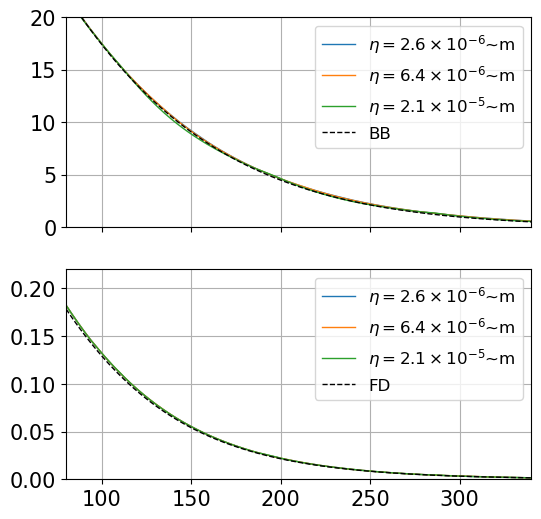

In [4]:
emodes_files = ["./Data/Emodes/Emodes_0_6pi_Tp0.4_L1200_Np12.npz",
               "./Data/Emodes/Emodes_0_6pi_Tp0.1_L1200_Np12.npz",
               "./Data/Emodes/Emodes_0_6pi_Tp0.01_L1200_Np12.npz"
               ]
photon_files= ['./Data/recursive/Photon_n_0_6pi_rec_Tp0.4_n1000_L1200_gr1e+13_gc1e+09_A1e-16_N601.npz',
               './Data/recursive/Photon_n_0_6pi_rec_Tp0.1_n1000_L1200_gr1e+13_gc1e+09_A1e-16_N601.npz',
               './Data/recursive/Photon_n_0_6pi_rec_Tp0.01_n1000_L1200_gr1e+13_gc1e+09_A1e-16_N601.npz'
              ]   

fig, axs = plt.subplots(2, 1, sharex=True,figsize=(6,6))
plt.subplot(211)

for i in range(3):
    emodes = np.load(emodes_files[i], allow_pickle=True)
    ks = emodes["ks"]
    G_in = emodes["G_in"]
    G_out = emodes["G_out"]
    G_out_ep = emodes["G_out_ep"]
    Omega_k = ks/lp*c0/gamma
    nit = np.load(photon_files[i])
    Nk = nit["Nk"]
    Sout = func_Sout(Nk,Omega_k,G_out)
    plt.plot(Omega_k,Sout,linewidth=1)

plt.plot(Omega_k, Omega_k /(np.exp(hbar_normal*Omega_k/(kb_normal*Temp))-1),'k--' ,label=r'$\frac{\omega}{(e^{\hbar\omega/k_b T} -1)}$',linewidth=1)
plt.legend([r'$\eta=2.6 \times 10^{-6}$~m',r'$\eta=6.4 \times 10^{-6}$~m',r'$\eta=2.1 \times 10^{-5}$~m','BB'],fontsize=12)

plt.grid()
plt.xlim([80,340])
plt.ylim([0,20])

plt.subplot(212)

for i in range(3):
        nit = np.load(photon_files[i])
        Nb = nit["Nb"]
        nn = 1000
        omega_n = np.linspace(0.1,5.2e2,nn)
        plt.plot(omega_n,Nb/601,linewidth=1)


plt.plot(Omega_k, 1 /(np.exp(hbar_normal*Omega_k/(kb_normal*Temp))+1),'k--' ,label=r'$\frac{1}{(e^{\hbar\omega/k_b T} +1)}$',linewidth=1)
plt.legend([r'$\eta=2.6 \times 10^{-6}$~m',r'$\eta=6.4 \times 10^{-6}$~m',r'$\eta=2.1 \times 10^{-5}$~m','FD'],fontsize=12)

plt.ylim([0,0.22])
plt.grid()
plt.show()

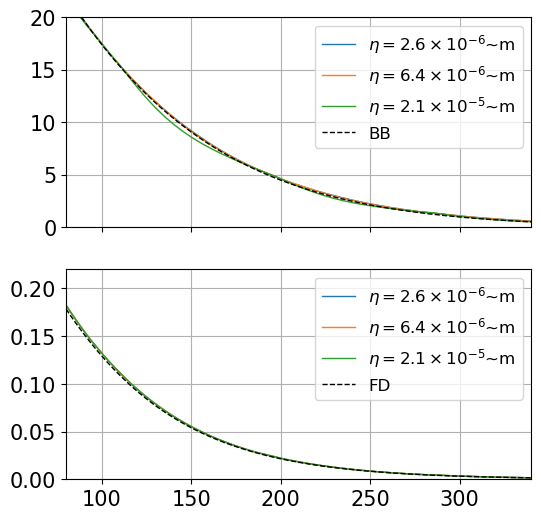

In [5]:
emodes_files = ["./Data/Emodes/Emodes_0_6pi_Tp0.4_L1200_Np12.npz",
               "./Data/Emodes/Emodes_0_6pi_Tp0.1_L1200_Np12.npz",
               "./Data/Emodes/Emodes_0_6pi_Tp0.01_L1200_Np12.npz"
               ]
photon_files= ['./Data/recursive/Photon_n_0_6pi_rec_Tp0.4_n500_L1200_gr1e+13_gc1e+09_A1e-16_N601.npz',
               './Data/recursive/Photon_n_0_6pi_rec_Tp0.1_n500_L1200_gr1e+13_gc1e+09_A1e-16_N601.npz',
               './Data/recursive/Photon_n_0_6pi_rec_Tp0.01_n500_L1200_gr1e+13_gc1e+09_A1e-16_N601.npz'
              ]   

fig, axs = plt.subplots(2, 1, sharex=True,figsize=(6,6))
plt.subplot(211)

for i in range(3):
    emodes = np.load(emodes_files[i], allow_pickle=True)
    ks = emodes["ks"]
    G_in = emodes["G_in"]
    G_out = emodes["G_out"]
    G_out_ep = emodes["G_out_ep"]
    Omega_k = ks/lp*c0/gamma
    nit = np.load(photon_files[i])
    Nk = nit["Nk"]
    Sout = func_Sout(Nk,Omega_k,G_out)
    plt.plot(Omega_k,Sout,linewidth=1)

plt.plot(Omega_k, Omega_k /(np.exp(hbar_normal*Omega_k/(kb_normal*Temp))-1),'k--' ,linewidth=1)
plt.legend([r'$\eta=2.6 \times 10^{-6}$~m',r'$\eta=6.4 \times 10^{-6}$~m',r'$\eta=2.1 \times 10^{-5}$~m','BB'],fontsize=12)

plt.grid()
plt.xlim([80,340])
plt.ylim([0,20])

plt.subplot(212)

for i in range(3):
        nit = np.load(photon_files[i])
        Nb = nit["Nb"]
        nn = 500
        omega_n = np.linspace(0.1,5.2e2,nn)
        plt.plot(omega_n,Nb/601,linewidth=1)


plt.plot(Omega_k, 1 /(np.exp(hbar_normal*Omega_k/(kb_normal*Temp))+1),'k--' ,linewidth=1)
plt.legend([r'$\eta=2.6 \times 10^{-6}$~m',r'$\eta=6.4 \times 10^{-6}$~m',r'$\eta=2.1 \times 10^{-5}$~m','FD'],fontsize=12)

plt.ylim([0,0.22])
plt.grid()
plt.show()

# $A=10^{-14}$ $\gamma_c=1e9$

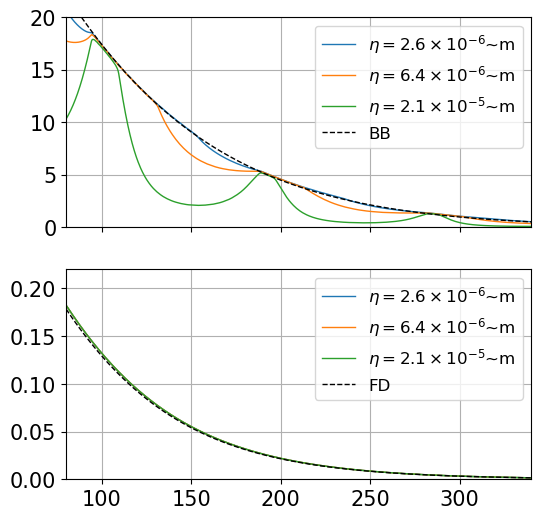

In [9]:
emodes_files = ["./Data/Emodes/Emodes_0_6pi_Tp0.4_L1200_Np12.npz",
               "./Data/Emodes/Emodes_0_6pi_Tp0.1_L1200_Np12.npz",
               "./Data/Emodes/Emodes_0_6pi_Tp0.01_L1200_Np12.npz"
               ]
photon_files= ['./Data/recursive/Photon_n_0_6pi_rec_Tp0.4_n1000_L1200_gr1e+13_gc1e+09_A1e-14_N601.npz',
               './Data/recursive/Photon_n_0_6pi_rec_Tp0.1_n1000_L1200_gr1e+13_gc1e+09_A1e-14_N601.npz',
               './Data/recursive/Photon_n_0_6pi_rec_Tp0.01_n1000_L1200_gr1e+13_gc1e+09_A1e-14_N601.npz'
              ]   

fig, axs = plt.subplots(2, 1, sharex=True,figsize=(6,6))
plt.subplot(211)

for i in range(3):
    emodes = np.load(emodes_files[i], allow_pickle=True)
    ks = emodes["ks"]
    G_in = emodes["G_in"]
    G_out = emodes["G_out"]
    G_out_ep = emodes["G_out_ep"]
    Omega_k = ks/lp*c0/gamma
    nit = np.load(photon_files[i])
    Nk = nit["Nk"]
    Sout = func_Sout(Nk,Omega_k,G_out)
    plt.plot(Omega_k,Sout,linewidth=1)

plt.plot(Omega_k, Omega_k /(np.exp(hbar_normal*Omega_k/(kb_normal*Temp))-1),'k--' ,label=r'$\frac{\omega}{(e^{\hbar\omega/k_b T} -1)}$',linewidth=1)
plt.legend([r'$\eta=2.6 \times 10^{-6}$~m',r'$\eta=6.4 \times 10^{-6}$~m',r'$\eta=2.1 \times 10^{-5}$~m','BB'],fontsize=12)

plt.grid()
plt.xlim([80,340])
plt.ylim([0,20])

plt.subplot(212)

for i in range(3):
        nit = np.load(photon_files[i])
        Nb = nit["Nb"]
        nn = 1000
        omega_n = np.linspace(0.1,5.2e2,nn)
        plt.plot(omega_n,Nb/601,linewidth=1)


plt.plot(Omega_k, 1 /(np.exp(hbar_normal*Omega_k/(kb_normal*Temp))+1),'k--' ,label=r'$\frac{1}{(e^{\hbar\omega/k_b T} +1)}$',linewidth=1)
plt.legend([r'$\eta=2.6 \times 10^{-6}$~m',r'$\eta=6.4 \times 10^{-6}$~m',r'$\eta=2.1 \times 10^{-5}$~m','FD'],fontsize=12)

plt.ylim([0,0.22])
plt.grid()
plt.show()



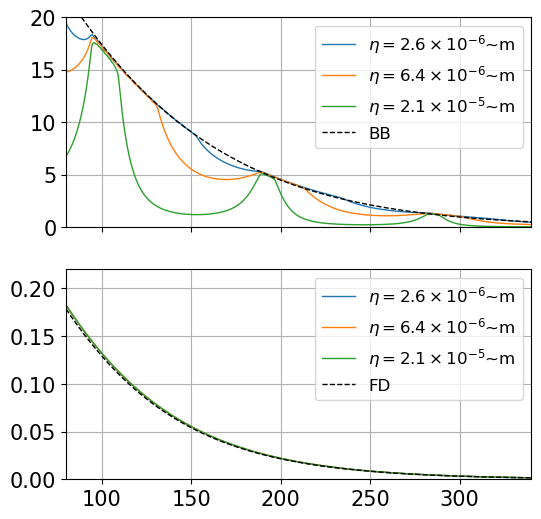

In [7]:
emodes_files = ["./Data/Emodes/Emodes_0_6pi_Tp0.4_L1200_Np12.npz",
               "./Data/Emodes/Emodes_0_6pi_Tp0.1_L1200_Np12.npz",
               "./Data/Emodes/Emodes_0_6pi_Tp0.01_L1200_Np12.npz"
               ]
photon_files= ['./Data/recursive/Photon_n_0_6pi_rec_Tp0.4_n500_L1200_gr1e+13_gc1e+09_A1e-14_N601.npz',
               './Data/recursive/Photon_n_0_6pi_rec_Tp0.1_n500_L1200_gr1e+13_gc1e+09_A1e-14_N601.npz',
               './Data/recursive/Photon_n_0_6pi_rec_Tp0.01_n500_L1200_gr1e+13_gc1e+09_A1e-14_N601.npz'
              ]   

fig, axs = plt.subplots(2, 1, sharex=True,figsize=(6,6))
plt.subplot(211)

for i in range(3):
    emodes = np.load(emodes_files[i], allow_pickle=True)
    ks = emodes["ks"]
    G_in = emodes["G_in"]
    G_out = emodes["G_out"]
    G_out_ep = emodes["G_out_ep"]
    Omega_k = ks/lp*c0/gamma
    nit = np.load(photon_files[i])
    Nk = nit["Nk"]
    Sout = func_Sout(Nk,Omega_k,G_out)
    plt.plot(Omega_k,Sout,linewidth=1)

plt.plot(Omega_k, Omega_k /(np.exp(hbar_normal*Omega_k/(kb_normal*Temp))-1),'k--' ,label=r'$\frac{\omega}{(e^{\hbar\omega/k_b T} -1)}$',linewidth=1)
plt.legend([r'$\eta=2.6 \times 10^{-6}$~m',r'$\eta=6.4 \times 10^{-6}$~m',r'$\eta=2.1 \times 10^{-5}$~m','BB'],fontsize=12)

plt.grid()
plt.xlim([80,340])
plt.ylim([0,20])

plt.subplot(212)

for i in range(3):
        nit = np.load(photon_files[i])
        Nb = nit["Nb"]
        nn = 500
        omega_n = np.linspace(0.1,5.2e2,nn)
        plt.plot(omega_n,Nb/601,linewidth=1)


plt.plot(Omega_k, 1 /(np.exp(hbar_normal*Omega_k/(kb_normal*Temp))+1),'k--' ,label=r'$\frac{1}{(e^{\hbar\omega/k_b T} +1)}$',linewidth=1)
plt.legend([r'$\eta=2.6 \times 10^{-6}$~m',r'$\eta=6.4 \times 10^{-6}$~m',r'$\eta=2.1 \times 10^{-5}$~m','FD'],fontsize=12)

plt.ylim([0,0.22])
plt.grid()
plt.show()



# $A=10^{-16}$ and $\gamma_c$ varies $T_p=0.01$

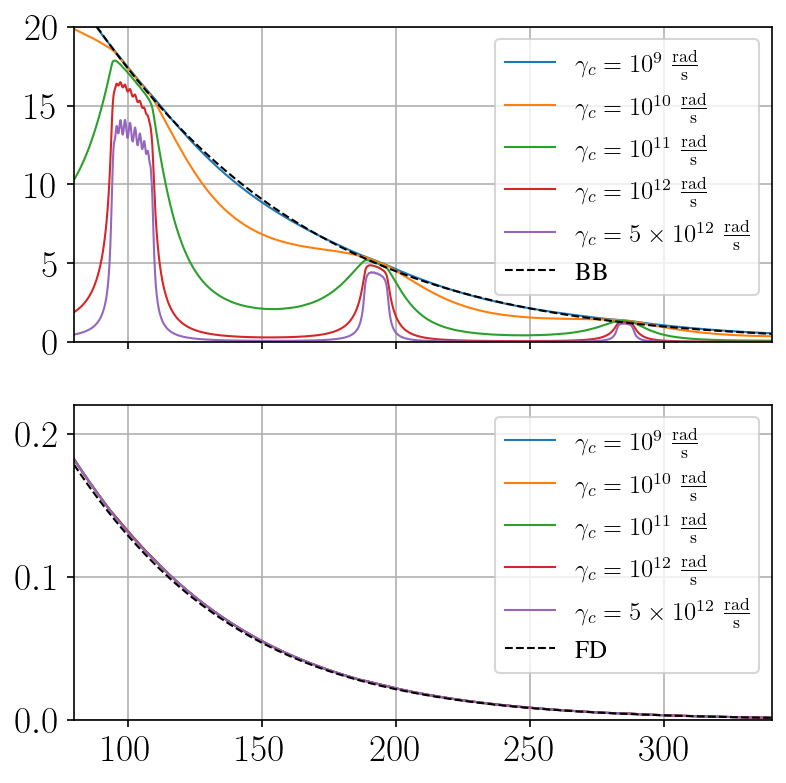

In [50]:
emodes_files = "./Data/Emodes/Emodes_0_6pi_Tp0.01_L1200_Np12.npz"
emodes = np.load(emodes_files, allow_pickle=True)
ks = emodes["ks"]
G_in = emodes["G_in"]
G_out = emodes["G_out"]
G_out_ep = emodes["G_out_ep"]
Omega_k = ks/lp*c0/gamma

PN_files = ['./Data/recursive/Photon_n_0_6pi_Tp0.01_n1000_gr1e+13_gc1e+09.npz',
            #'./Data/recursive/Photon_n_0_6pi_Tp0.01_n1000_gr1e+13_gc5e+09.npz',
            './Data/recursive/Photon_n_0_6pi_Tp0.01_n1000_gr1e+13_gc1e+10.npz',
            #'./Data/recursive/Photon_n_0_6pi_Tp0.01_n1000_gr1e+13_gc5e+10.npz',
            './Data/recursive/Photon_n_0_6pi_Tp0.01_n1000_gr1e+13_gc1e+11.npz',
            #'./Data/recursive/Photon_n_0_6pi_Tp0.01_n1000_gr1e+13_gc5e+11.npz',
            './Data/recursive/Photon_n_0_6pi_Tp0.01_n1000_gr1e+13_gc1e+12.npz',
            './Data/recursive/Photon_n_0_6pi_Tp0.01_n1000_gr1e+13_gc5e+12.npz'
           ]

fig, axs = plt.subplots(2, 1, sharex=True,figsize=(6,6))
plt.subplot(211)

for i in range(len(PN_files)):
    nit = np.load(PN_files[i])
    Nk = nit["Nk"]
    Sout = func_Sout(Nk,Omega_k,G_out)
    plt.plot(Omega_k,Sout,linewidth=1)

plt.plot(Omega_k, Omega_k /(np.exp(hbar_normal*Omega_k/(kb_normal*Temp))-1),'k--' ,label=r'$\frac{\omega}{(e^{\hbar\omega/k_b T} -1)}$',linewidth=1)

plt.grid()
plt.xlim([80,340])
plt.ylim([0,20])
plt.legend([r'$\gamma_c= 10^{9}~\frac{\mathrm{rad}}{\mathrm{s}}$',r'$\gamma_c=  10^{10}~\frac{\mathrm{rad}}{\mathrm{s}}$',
            r'$\gamma_c=  10^{11}~\frac{\mathrm{rad}}{\mathrm{s}}$',
            r'$\gamma_c=  10^{12}~\frac{\mathrm{rad}}{\mathrm{s}}$',
            r'$\gamma_c=  5\times10^{12}~\frac{\mathrm{rad}}{\mathrm{s}}$','BB'],fontsize=12)

plt.subplot(212)

for i in range(len(PN_files)):
        nit = np.load(PN_files[i])
        Nb = nit["Nb"]
        nn = 1000
        omega_n = np.linspace(0.1,5.2e2,nn)
        plt.plot(omega_n,Nb/601,linewidth=1)


plt.plot(Omega_k, 1 /(np.exp(hbar_normal*Omega_k/(kb_normal*Temp))+1),'k--' ,label=r'$\frac{1}{(e^{\hbar\omega/k_b T} +1)}$',linewidth=1)
plt.legend([r'$\gamma_c= 10^{9}~\frac{\mathrm{rad}}{\mathrm{s}}$',r'$\gamma_c=  10^{10}~\frac{\mathrm{rad}}{\mathrm{s}}$',r'$\gamma_c=  10^{11}~\frac{\mathrm{rad}}{\mathrm{s}}$',
            r'$\gamma_c=  10^{12}~\frac{\mathrm{rad}}{\mathrm{s}}$',
            r'$\gamma_c=  5\times10^{12}~\frac{\mathrm{rad}}{\mathrm{s}}$','FD'],fontsize=12)

plt.ylim([0,0.22])
plt.grid()
plt.show()

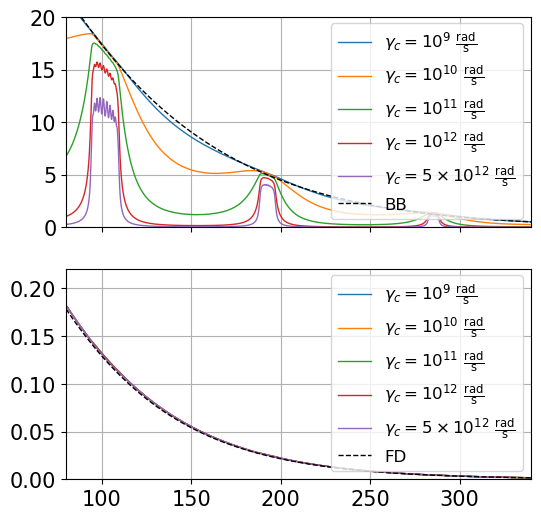

In [11]:
emodes_files = "./Data/Emodes/Emodes_0_6pi_Tp0.01_L1200_Np12.npz"
emodes = np.load(emodes_files, allow_pickle=True)
ks = emodes["ks"]
G_in = emodes["G_in"]
G_out = emodes["G_out"]
G_out_ep = emodes["G_out_ep"]
Omega_k = ks/lp*c0/gamma

PN_files = ['./Data/recursive/Photon_n_0_6pi_rec_Tp0.01_n500_L1200_gr1e+13_gc1e+09_A1e-16_N601.npz',
            #'./Data/recursive/Photon_n_0_6pi_Tp0.01_n1000_gr1e+13_gc5e+09.npz',
            './Data/recursive/Photon_n_0_6pi_rec_Tp0.01_n500_L1200_gr1e+13_gc1e+10_A1e-16_N601.npz',
            #'./Data/recursive/Photon_n_0_6pi_Tp0.01_n1000_gr1e+13_gc5e+10.npz',
            './Data/recursive/Photon_n_0_6pi_rec_Tp0.01_n500_L1200_gr1e+13_gc1e+11_A1e-16_N601.npz',
            #'./Data/recursive/Photon_n_0_6pi_Tp0.01_n1000_gr1e+13_gc5e+11.npz',
            './Data/recursive/Photon_n_0_6pi_rec_Tp0.01_n500_L1200_gr1e+13_gc1e+12_A1e-16_N601.npz',
            './Data/recursive/Photon_n_0_6pi_rec_Tp0.01_n500_L1200_gr1e+13_gc5e+12_A1e-16_N601.npz'
           ]

fig, axs = plt.subplots(2, 1, sharex=True,figsize=(6,6))
plt.subplot(211)

for i in range(len(PN_files)):
    nit = np.load(PN_files[i])
    Nk = nit["Nk"]
    Sout = func_Sout(Nk,Omega_k,G_out)
    plt.plot(Omega_k,Sout,linewidth=1)

plt.plot(Omega_k, Omega_k /(np.exp(hbar_normal*Omega_k/(kb_normal*Temp))-1),'k--' ,label=r'$\frac{\omega}{(e^{\hbar\omega/k_b T} -1)}$',linewidth=1)

plt.grid()
plt.xlim([80,340])
plt.ylim([0,20])
plt.legend([r'$\gamma_c= 10^{9}~\frac{\mathrm{rad}}{\mathrm{s}}$',r'$\gamma_c=  10^{10}~\frac{\mathrm{rad}}{\mathrm{s}}$',
            r'$\gamma_c=  10^{11}~\frac{\mathrm{rad}}{\mathrm{s}}$',
            r'$\gamma_c=  10^{12}~\frac{\mathrm{rad}}{\mathrm{s}}$',
            r'$\gamma_c=  5\times10^{12}~\frac{\mathrm{rad}}{\mathrm{s}}$','BB'],fontsize=12)

plt.subplot(212)

for i in range(len(PN_files)):
        nit = np.load(PN_files[i])
        Nb = nit["Nb"]
        nn = 500
        omega_n = np.linspace(0.1,5.2e2,nn)
        plt.plot(omega_n,Nb/601,linewidth=1)


plt.plot(Omega_k, 1 /(np.exp(hbar_normal*Omega_k/(kb_normal*Temp))+1),'k--' ,label=r'$\frac{1}{(e^{\hbar\omega/k_b T} +1)}$',linewidth=1)
plt.legend([r'$\gamma_c= 10^{9}~\frac{\mathrm{rad}}{\mathrm{s}}$',r'$\gamma_c=  10^{10}~\frac{\mathrm{rad}}{\mathrm{s}}$',r'$\gamma_c=  10^{11}~\frac{\mathrm{rad}}{\mathrm{s}}$',
            r'$\gamma_c=  10^{12}~\frac{\mathrm{rad}}{\mathrm{s}}$',
            r'$\gamma_c=  5\times10^{12}~\frac{\mathrm{rad}}{\mathrm{s}}$','FD'],fontsize=12)

plt.ylim([0,0.22])
plt.grid()
plt.show()

Combined Plot

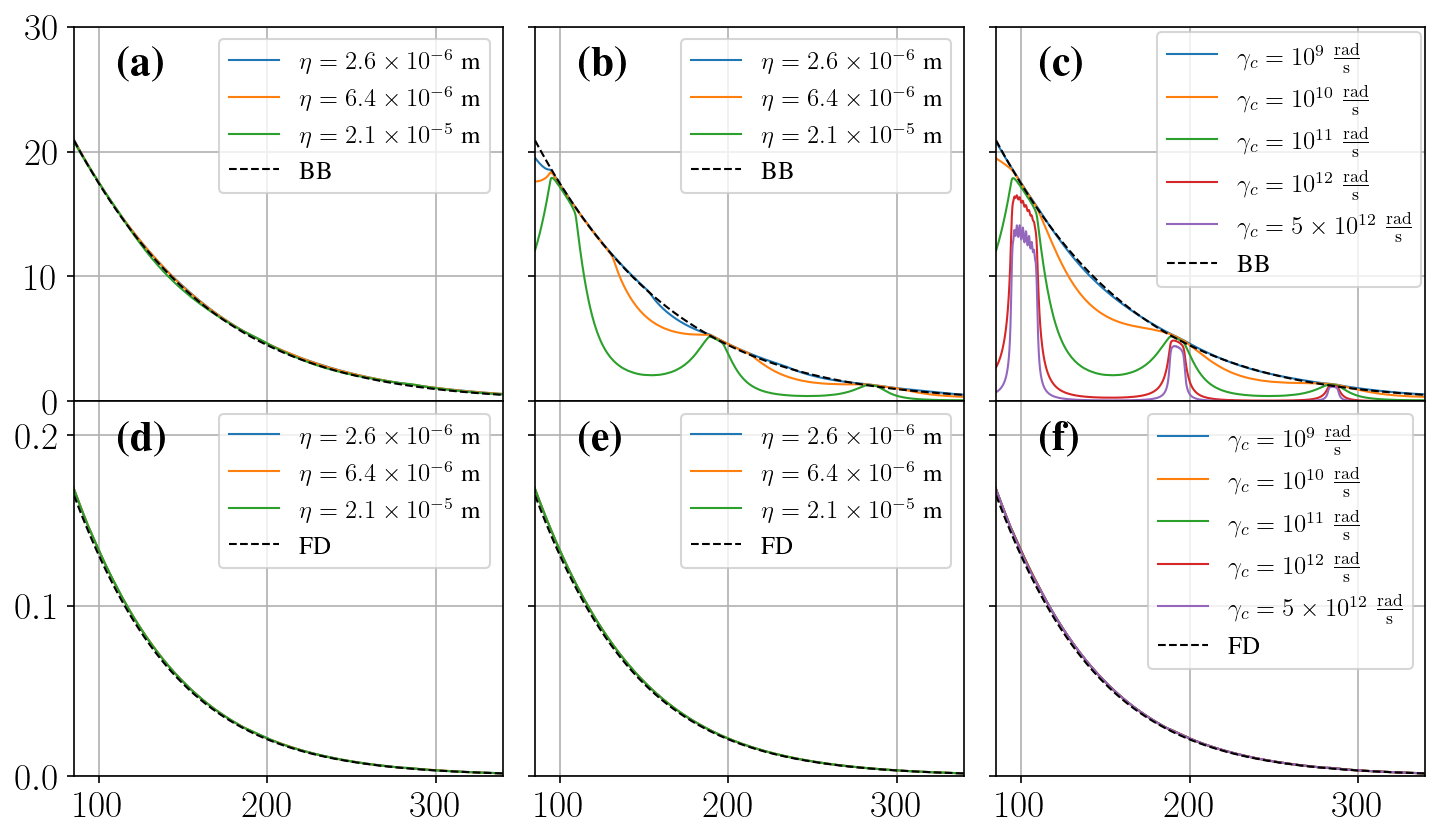

In [107]:
fig, axs = plt.subplots(2, 3, sharex=True,sharey='row',figsize=(10,6))
############## plot1
##############

ax=plt.subplot(231)
ax.text(0.1, 0.95, r'\textbf{(a)}', transform=ax.transAxes, fontsize=20, va='top')
emodes_files = ["./Data/Emodes/Emodes_0_6pi_Tp0.4_L1200_Np12.npz",
               "./Data/Emodes/Emodes_0_6pi_Tp0.1_L1200_Np12.npz",
               "./Data/Emodes/Emodes_0_6pi_Tp0.01_L1200_Np12.npz"
               ]
photon_files= ['./Data/recursive/Photon_n_0_6pi_rec_Tp0.4_n1000_L1200_gr1e+13_gc1e+09_A1e-16_N601.npz',
               './Data/recursive/Photon_n_0_6pi_rec_Tp0.1_n1000_L1200_gr1e+13_gc1e+09_A1e-16_N601.npz',
               './Data/recursive/Photon_n_0_6pi_rec_Tp0.01_n1000_L1200_gr1e+13_gc1e+09_A1e-16_N601.npz'
              ]   
for i in range(3):
    emodes = np.load(emodes_files[i], allow_pickle=True)
    ks = emodes["ks"]
    G_in = emodes["G_in"]
    G_out = emodes["G_out"]
    G_out_ep = emodes["G_out_ep"]
    Omega_k = ks/lp*c0/gamma
    nit = np.load(photon_files[i])
    Nk = nit["Nk"]
    Sout = func_Sout(Nk,Omega_k,G_out)
    plt.plot(Omega_k,Sout,linewidth=1)

plt.plot(Omega_k, Omega_k /(np.exp(hbar_normal*Omega_k/(kb_normal*Temp))-1),'k--' ,label=r'$\frac{\omega}{(e^{\hbar\omega/k_b T} -1)}$',linewidth=1)
plt.legend([r'$\eta=2.6 \times 10^{-6}$~m',r'$\eta=6.4 \times 10^{-6}$~m',r'$\eta=2.1 \times 10^{-5}$~m','BB'],fontsize=12)

plt.grid()
plt.xlim([85,340])
plt.ylim([0,30])


ax=plt.subplot(234)
ax.text(0.1, 0.95, r'\textbf{(d)}', transform=ax.transAxes, fontsize=20, va='top')

for i in range(3):
        nit = np.load(photon_files[i])
        Nb = nit["Nb"]
        nn = 1000
        omega_n = np.linspace(0.1,5.2e2,nn)
        plt.plot(omega_n,Nb/601,linewidth=1)


plt.plot(Omega_k, 1 /(np.exp(hbar_normal*Omega_k/(kb_normal*Temp))+1),'k--' ,label=r'$\frac{1}{(e^{\hbar\omega/k_b T} +1)}$',linewidth=1)
plt.legend([r'$\eta=2.6 \times 10^{-6}$~m',r'$\eta=6.4 \times 10^{-6}$~m',r'$\eta=2.1 \times 10^{-5}$~m','FD'],fontsize=12)
plt.grid()
plt.ylim([0,0.22])

plt.tight_layout()


############## plot2
##############
ax=plt.subplot(232)
ax.text(0.1, 0.95, r'\textbf{(b)}', transform=ax.transAxes, fontsize=20, va='top')

emodes_files = ["./Data/Emodes/Emodes_0_6pi_Tp0.4_L1200_Np12.npz",
               "./Data/Emodes/Emodes_0_6pi_Tp0.1_L1200_Np12.npz",
               "./Data/Emodes/Emodes_0_6pi_Tp0.01_L1200_Np12.npz"
               ]
photon_files= ['./Data/recursive/Photon_n_0_6pi_rec_Tp0.4_n1000_L1200_gr1e+13_gc1e+09_A1e-14_N601.npz',
               './Data/recursive/Photon_n_0_6pi_rec_Tp0.1_n1000_L1200_gr1e+13_gc1e+09_A1e-14_N601.npz',
               './Data/recursive/Photon_n_0_6pi_rec_Tp0.01_n1000_L1200_gr1e+13_gc1e+09_A1e-14_N601.npz'
              ]   
for i in range(3):
    emodes = np.load(emodes_files[i], allow_pickle=True)
    ks = emodes["ks"]
    G_in = emodes["G_in"]
    G_out = emodes["G_out"]
    G_out_ep = emodes["G_out_ep"]
    Omega_k = ks/lp*c0/gamma
    nit = np.load(photon_files[i])
    Nk = nit["Nk"]
    Sout = func_Sout(Nk,Omega_k,G_out)
    plt.plot(Omega_k,Sout,linewidth=1)

plt.plot(Omega_k, Omega_k /(np.exp(hbar_normal*Omega_k/(kb_normal*Temp))-1),'k--' ,label=r'$\frac{\omega}{(e^{\hbar\omega/k_b T} -1)}$',linewidth=1)
plt.legend([r'$\eta=2.6 \times 10^{-6}$~m',r'$\eta=6.4 \times 10^{-6}$~m',r'$\eta=2.1 \times 10^{-5}$~m','BB'],fontsize=12)

plt.grid()
plt.xlim([85,340])
plt.ylim([0,30])

ax = plt.subplot(235)
ax.text(0.1, 0.95, r'\textbf{(e)}', transform=ax.transAxes, fontsize=20, va='top')

for i in range(3):
        nit = np.load(photon_files[i])
        Nb = nit["Nb"]
        nn = 1000
        omega_n = np.linspace(0.1,5.2e2,nn)
        plt.plot(omega_n,Nb/601,linewidth=1)


plt.plot(Omega_k, 1 /(np.exp(hbar_normal*Omega_k/(kb_normal*Temp))+1),'k--' ,label=r'$\frac{1}{(e^{\hbar\omega/k_b T} +1)}$',linewidth=1)
plt.legend([r'$\eta=2.6 \times 10^{-6}$~m',r'$\eta=6.4 \times 10^{-6}$~m',r'$\eta=2.1 \times 10^{-5}$~m','FD'],fontsize=12)

plt.ylim([0,0.22])
plt.grid()

############## plot3
##############
ax=plt.subplot(233)
ax.text(0.1, 0.95, r'\textbf{(c)}', transform=ax.transAxes, fontsize=20, va='top')

emodes_files = "./Data/Emodes/Emodes_0_6pi_Tp0.01_L1200_Np12.npz"
emodes = np.load(emodes_files, allow_pickle=True)
ks = emodes["ks"]
G_in = emodes["G_in"]
G_out = emodes["G_out"]
G_out_ep = emodes["G_out_ep"]
Omega_k = ks/lp*c0/gamma

PN_files = ['./Data/recursive/Photon_n_0_6pi_Tp0.01_n1000_gr1e+13_gc1e+09.npz',
            #'./Data/recursive/Photon_n_0_6pi_Tp0.01_n1000_gr1e+13_gc5e+09.npz',
            './Data/recursive/Photon_n_0_6pi_Tp0.01_n1000_gr1e+13_gc1e+10.npz',
            #'./Data/recursive/Photon_n_0_6pi_Tp0.01_n1000_gr1e+13_gc5e+10.npz',
            './Data/recursive/Photon_n_0_6pi_Tp0.01_n1000_gr1e+13_gc1e+11.npz',
            #'./Data/recursive/Photon_n_0_6pi_Tp0.01_n1000_gr1e+13_gc5e+11.npz',
            './Data/recursive/Photon_n_0_6pi_Tp0.01_n1000_gr1e+13_gc1e+12.npz',
            './Data/recursive/Photon_n_0_6pi_Tp0.01_n1000_gr1e+13_gc5e+12.npz'
           ]

for i in range(len(PN_files)):
    nit = np.load(PN_files[i])
    Nk = nit["Nk"]
    Sout = func_Sout(Nk,Omega_k,G_out)
    plt.plot(Omega_k,Sout,linewidth=1)

plt.plot(Omega_k, Omega_k /(np.exp(hbar_normal*Omega_k/(kb_normal*Temp))-1),'k--' ,label=r'$\frac{\omega}{(e^{\hbar\omega/k_b T} -1)}$',linewidth=1)

plt.grid()
plt.xlim([85,340])
plt.ylim([0,30])
plt.legend([r'$\gamma_c= 10^{9}~\frac{\mathrm{rad}}{\mathrm{s}}$',r'$\gamma_c=  10^{10}~\frac{\mathrm{rad}}{\mathrm{s}}$',
            r'$\gamma_c=  10^{11}~\frac{\mathrm{rad}}{\mathrm{s}}$',
            r'$\gamma_c=  10^{12}~\frac{\mathrm{rad}}{\mathrm{s}}$',
            r'$\gamma_c=  5\times10^{12}~\frac{\mathrm{rad}}{\mathrm{s}}$','BB'],fontsize=12,bbox_to_anchor=(1.02, 1.02)
)

ax = plt.subplot(236)
ax.text(0.1, 0.95, r'\textbf{(f)}', transform=ax.transAxes, fontsize=20, va='top')

for i in range(len(PN_files)):
        nit = np.load(PN_files[i])
        Nb = nit["Nb"]
        nn = 1000
        omega_n = np.linspace(0.1,5.2e2,nn)
        plt.plot(omega_n,Nb/601,linewidth=1)


plt.plot(Omega_k, 1 /(np.exp(hbar_normal*Omega_k/(kb_normal*Temp))+1),'k--' ,label=r'$\frac{1}{(e^{\hbar\omega/k_b T} +1)}$',linewidth=1)
plt.legend([r'$\gamma_c= 10^{9}~\frac{\mathrm{rad}}{\mathrm{s}}$',r'$\gamma_c=  10^{10}~\frac{\mathrm{rad}}{\mathrm{s}}$',r'$\gamma_c=  10^{11}~\frac{\mathrm{rad}}{\mathrm{s}}$',
            r'$\gamma_c=  10^{12}~\frac{\mathrm{rad}}{\mathrm{s}}$',
            r'$\gamma_c=  5\times10^{12}~\frac{\mathrm{rad}}{\mathrm{s}}$','FD'],fontsize=12)

plt.ylim([0,0.22])
plt.grid()
plt.subplots_adjust(hspace=0,wspace=0.075)  # Zero vertical spacing between subplots
plt.show()


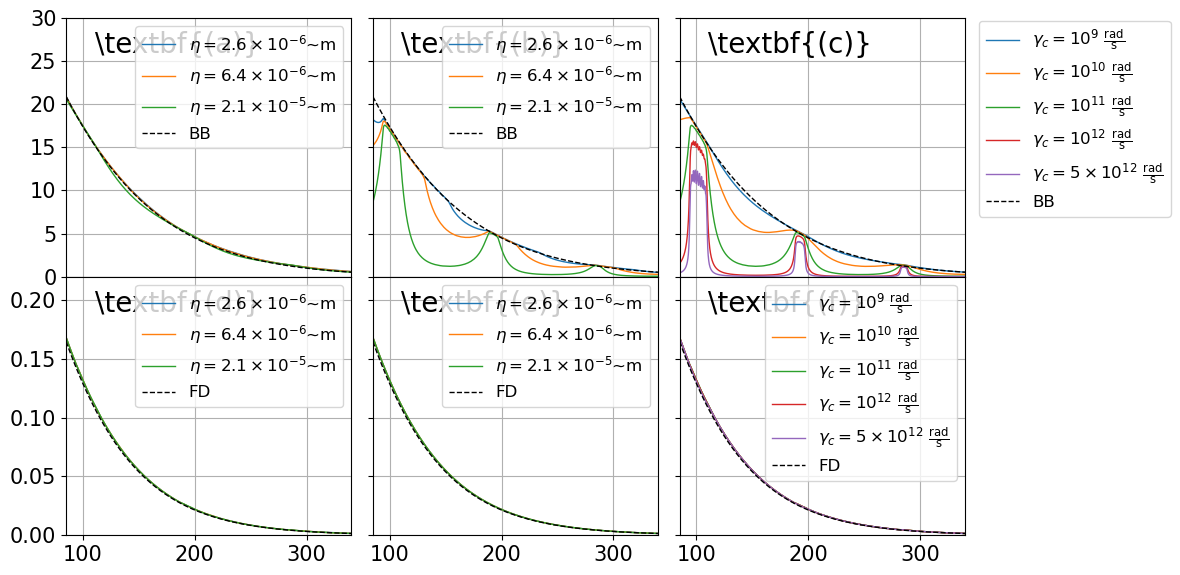

In [12]:
fig, axs = plt.subplots(2, 3, sharex=True,sharey='row',figsize=(10,6))
############## plot1
##############

ax=plt.subplot(231)
ax.text(0.1, 0.95, r'\textbf{(a)}', transform=ax.transAxes, fontsize=20, va='top')
emodes_files = ["./Data/Emodes/Emodes_0_6pi_Tp0.4_L1200_Np12.npz",
               "./Data/Emodes/Emodes_0_6pi_Tp0.1_L1200_Np12.npz",
               "./Data/Emodes/Emodes_0_6pi_Tp0.01_L1200_Np12.npz"
               ]
photon_files= ['./Data/recursive/Photon_n_0_6pi_rec_Tp0.4_n500_L1200_gr1e+13_gc1e+09_A1e-16_N601.npz',
               './Data/recursive/Photon_n_0_6pi_rec_Tp0.1_n500_L1200_gr1e+13_gc1e+09_A1e-16_N601.npz',
               './Data/recursive/Photon_n_0_6pi_rec_Tp0.01_n500_L1200_gr1e+13_gc1e+09_A1e-16_N601.npz'
              ]   
for i in range(3):
    emodes = np.load(emodes_files[i], allow_pickle=True)
    ks = emodes["ks"]
    G_in = emodes["G_in"]
    G_out = emodes["G_out"]
    G_out_ep = emodes["G_out_ep"]
    Omega_k = ks/lp*c0/gamma
    nit = np.load(photon_files[i])
    Nk = nit["Nk"]
    Sout = func_Sout(Nk,Omega_k,G_out)
    plt.plot(Omega_k,Sout,linewidth=1)

plt.plot(Omega_k, Omega_k /(np.exp(hbar_normal*Omega_k/(kb_normal*Temp))-1),'k--' ,label=r'$\frac{\omega}{(e^{\hbar\omega/k_b T} -1)}$',linewidth=1)
plt.legend([r'$\eta=2.6 \times 10^{-6}$~m',r'$\eta=6.4 \times 10^{-6}$~m',r'$\eta=2.1 \times 10^{-5}$~m','BB'],fontsize=12)

plt.grid()
plt.xlim([85,340])
plt.ylim([0,30])


ax=plt.subplot(234)
ax.text(0.1, 0.95, r'\textbf{(d)}', transform=ax.transAxes, fontsize=20, va='top')

for i in range(3):
        nit = np.load(photon_files[i])
        Nb = nit["Nb"]
        nn = 500
        omega_n = np.linspace(0.1,5.2e2,nn)
        plt.plot(omega_n,Nb/601,linewidth=1)


plt.plot(Omega_k, 1 /(np.exp(hbar_normal*Omega_k/(kb_normal*Temp))+1),'k--' ,label=r'$\frac{1}{(e^{\hbar\omega/k_b T} +1)}$',linewidth=1)
plt.legend([r'$\eta=2.6 \times 10^{-6}$~m',r'$\eta=6.4 \times 10^{-6}$~m',r'$\eta=2.1 \times 10^{-5}$~m','FD'],fontsize=12)
plt.grid()
plt.ylim([0,0.22])

plt.tight_layout()


############## plot2
##############
ax=plt.subplot(232)
ax.text(0.1, 0.95, r'\textbf{(b)}', transform=ax.transAxes, fontsize=20, va='top')

emodes_files = ["./Data/Emodes/Emodes_0_6pi_Tp0.4_L1200_Np12.npz",
               "./Data/Emodes/Emodes_0_6pi_Tp0.1_L1200_Np12.npz",
               "./Data/Emodes/Emodes_0_6pi_Tp0.01_L1200_Np12.npz"
               ]
photon_files= ['./Data/recursive/Photon_n_0_6pi_rec_Tp0.4_n500_L1200_gr1e+13_gc1e+09_A1e-14_N601.npz',
               './Data/recursive/Photon_n_0_6pi_rec_Tp0.1_n500_L1200_gr1e+13_gc1e+09_A1e-14_N601.npz',
               './Data/recursive/Photon_n_0_6pi_rec_Tp0.01_n500_L1200_gr1e+13_gc1e+09_A1e-14_N601.npz'
              ]   
for i in range(3):
    emodes = np.load(emodes_files[i], allow_pickle=True)
    ks = emodes["ks"]
    G_in = emodes["G_in"]
    G_out = emodes["G_out"]
    G_out_ep = emodes["G_out_ep"]
    Omega_k = ks/lp*c0/gamma
    nit = np.load(photon_files[i])
    Nk = nit["Nk"]
    Sout = func_Sout(Nk,Omega_k,G_out)
    plt.plot(Omega_k,Sout,linewidth=1)

plt.plot(Omega_k, Omega_k /(np.exp(hbar_normal*Omega_k/(kb_normal*Temp))-1),'k--' ,label=r'$\frac{\omega}{(e^{\hbar\omega/k_b T} -1)}$',linewidth=1)
plt.legend([r'$\eta=2.6 \times 10^{-6}$~m',r'$\eta=6.4 \times 10^{-6}$~m',r'$\eta=2.1 \times 10^{-5}$~m','BB'],fontsize=12)

plt.grid()
plt.xlim([85,340])
plt.ylim([0,30])

ax = plt.subplot(235)
ax.text(0.1, 0.95, r'\textbf{(e)}', transform=ax.transAxes, fontsize=20, va='top')

for i in range(3):
        nit = np.load(photon_files[i])
        Nb = nit["Nb"]
        nn = 500
        omega_n = np.linspace(0.1,5.2e2,nn)
        plt.plot(omega_n,Nb/601,linewidth=1)


plt.plot(Omega_k, 1 /(np.exp(hbar_normal*Omega_k/(kb_normal*Temp))+1),'k--' ,label=r'$\frac{1}{(e^{\hbar\omega/k_b T} +1)}$',linewidth=1)
plt.legend([r'$\eta=2.6 \times 10^{-6}$~m',r'$\eta=6.4 \times 10^{-6}$~m',r'$\eta=2.1 \times 10^{-5}$~m','FD'],fontsize=12)

plt.ylim([0,0.22])
plt.grid()

############## plot3
##############
ax=plt.subplot(233)
ax.text(0.1, 0.95, r'\textbf{(c)}', transform=ax.transAxes, fontsize=20, va='top')

emodes_files = "./Data/Emodes/Emodes_0_6pi_Tp0.01_L1200_Np12.npz"
emodes = np.load(emodes_files, allow_pickle=True)
ks = emodes["ks"]
G_in = emodes["G_in"]
G_out = emodes["G_out"]
G_out_ep = emodes["G_out_ep"]
Omega_k = ks/lp*c0/gamma

PN_files = ['./Data/recursive/Photon_n_0_6pi_rec_Tp0.01_n500_L1200_gr1e+13_gc1e+09_A1e-16_N601.npz',
            #'./Data/recursive/Photon_n_0_6pi_Tp0.01_n1000_gr1e+13_gc5e+09.npz',
            './Data/recursive/Photon_n_0_6pi_rec_Tp0.01_n500_L1200_gr1e+13_gc1e+10_A1e-16_N601.npz',
            #'./Data/recursive/Photon_n_0_6pi_Tp0.01_n1000_gr1e+13_gc5e+10.npz',
            './Data/recursive/Photon_n_0_6pi_rec_Tp0.01_n500_L1200_gr1e+13_gc1e+11_A1e-16_N601.npz',
            #'./Data/recursive/Photon_n_0_6pi_Tp0.01_n1000_gr1e+13_gc5e+11.npz',
            './Data/recursive/Photon_n_0_6pi_rec_Tp0.01_n500_L1200_gr1e+13_gc1e+12_A1e-16_N601.npz',
            './Data/recursive/Photon_n_0_6pi_rec_Tp0.01_n500_L1200_gr1e+13_gc5e+12_A1e-16_N601.npz'
           ]

for i in range(len(PN_files)):
    nit = np.load(PN_files[i])
    Nk = nit["Nk"]
    Sout = func_Sout(Nk,Omega_k,G_out)
    plt.plot(Omega_k,Sout,linewidth=1)

plt.plot(Omega_k, Omega_k /(np.exp(hbar_normal*Omega_k/(kb_normal*Temp))-1),'k--' ,label=r'$\frac{\omega}{(e^{\hbar\omega/k_b T} -1)}$',linewidth=1)

plt.grid()
plt.xlim([85,340])
plt.ylim([0,30])
plt.legend([r'$\gamma_c= 10^{9}~\frac{\mathrm{rad}}{\mathrm{s}}$',r'$\gamma_c=  10^{10}~\frac{\mathrm{rad}}{\mathrm{s}}$',
            r'$\gamma_c=  10^{11}~\frac{\mathrm{rad}}{\mathrm{s}}$',
            r'$\gamma_c=  10^{12}~\frac{\mathrm{rad}}{\mathrm{s}}$',
            r'$\gamma_c=  5\times10^{12}~\frac{\mathrm{rad}}{\mathrm{s}}$','BB'],fontsize=12,bbox_to_anchor=(1.02, 1.02)
)

ax = plt.subplot(236)
ax.text(0.1, 0.95, r'\textbf{(f)}', transform=ax.transAxes, fontsize=20, va='top')

for i in range(len(PN_files)):
        nit = np.load(PN_files[i])
        Nb = nit["Nb"]
        nn = 500
        omega_n = np.linspace(0.1,5.2e2,nn)
        plt.plot(omega_n,Nb/601,linewidth=1)


plt.plot(Omega_k, 1 /(np.exp(hbar_normal*Omega_k/(kb_normal*Temp))+1),'k--' ,label=r'$\frac{1}{(e^{\hbar\omega/k_b T} +1)}$',linewidth=1)
plt.legend([r'$\gamma_c= 10^{9}~\frac{\mathrm{rad}}{\mathrm{s}}$',r'$\gamma_c=  10^{10}~\frac{\mathrm{rad}}{\mathrm{s}}$',r'$\gamma_c=  10^{11}~\frac{\mathrm{rad}}{\mathrm{s}}$',
            r'$\gamma_c=  10^{12}~\frac{\mathrm{rad}}{\mathrm{s}}$',
            r'$\gamma_c=  5\times10^{12}~\frac{\mathrm{rad}}{\mathrm{s}}$','FD'],fontsize=12)

plt.ylim([0,0.22])
plt.grid()
plt.subplots_adjust(hspace=0,wspace=0.075)  # Zero vertical spacing between subplots
plt.show()


# Active

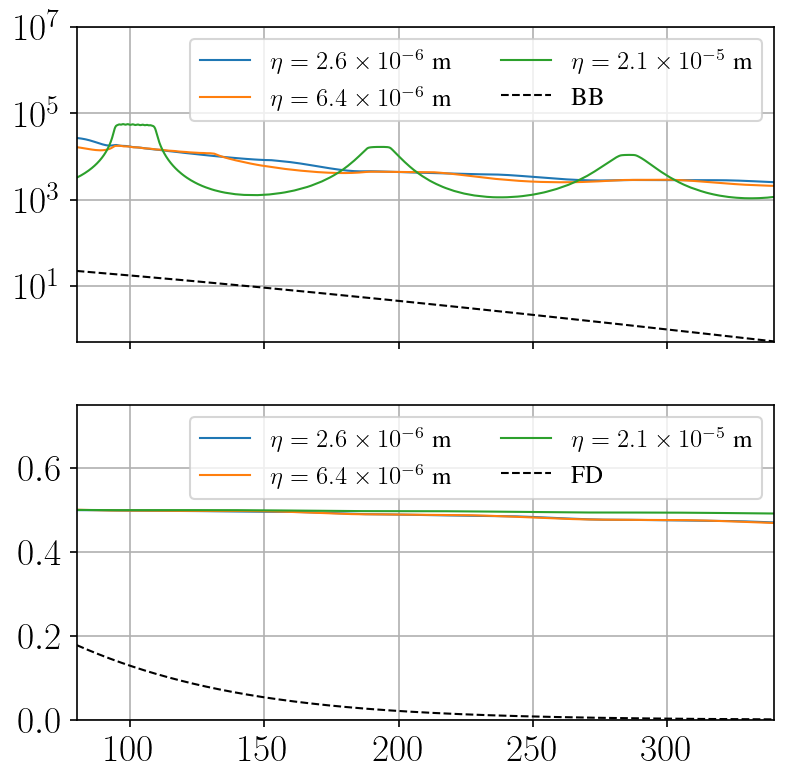

In [68]:
emodes_files = ['./Data/Emodes/Emodes_0_6pi_Tp0.4_L1200_Np12.npz',
                './Data/Emodes/Emodes_0_6pi_Tp0.1_L1200_Np12.npz',
                './Data/Emodes/Emodes_0_6pi_Tp0.01_L1200_Np12.npz']
PN_files = ['./Data/krylov/Photon_n_0_6pi_kry_Tp0.40_n500_gr1.0e+10_gc1.0e+09.npz',
            './Data/krylov/Photon_n_0_6pi_kry_Tp0.10_n500_gr1.0e+10_gc1.0e+09.npz',
            './Data/krylov/Photon_n_0_6pi_kry_Tp0.01_n500_gr1.0e+10_gc1.0e+09.npz']
              

fig, axs = plt.subplots(2, 1, sharex=True,figsize=(6,6))
plt.subplot(211)

for i in range(3):
    emodes = np.load(emodes_files[i], allow_pickle=True)
    ks = emodes["ks"]
    G_in = emodes["G_in"]
    G_out = emodes["G_out"]
    G_out_ep = emodes["G_out_ep"]
    Omega_k = ks/lp*c0/gamma
    nit = np.load(PN_files[i])
    Nk = nit["Nk"]
    Sout = func_Sout(Nk,Omega_k,G_out)
    plt.plot(Omega_k,Sout,linewidth=1)

plt.plot(Omega_k, Omega_k /(np.exp(hbar_normal*Omega_k/(kb_normal*Temp))-1),'k--' ,label=r'$\frac{\omega}{(e^{\hbar\omega/k_b T} -1)}$',linewidth=1)
plt.legend([r'$\eta=2.6 \times 10^{-6}$~m',r'$\eta=6.4 \times 10^{-6}$~m',r'$\eta=2.1 \times 10^{-5}$~m','BB'],fontsize=12,ncol=2)

plt.grid()
plt.xlim([80,340])
plt.ylim([0.5,1e7])
plt.yscale('log')

plt.subplot(212)

for i in range(3):
        nit = np.load(PN_files[i])
        Nb = nit["Nb"]
        nn = 500
        omega_n = np.linspace(0.1,5.2e2,nn)
        plt.plot(omega_n,Nb/601,linewidth=1)


plt.plot(Omega_k, 1 /(np.exp(hbar_normal*Omega_k/(kb_normal*Temp))+1),'k--' ,label=r'$\frac{1}{(e^{\hbar\omega/k_b T} +1)}$',linewidth=1)
plt.legend([r'$\eta=2.6 \times 10^{-6}$~m',r'$\eta=6.4 \times 10^{-6}$~m',r'$\eta=2.1 \times 10^{-5}$~m','FD'],fontsize=12,ncol=2)

plt.ylim([0,0.75])
plt.grid()
plt.show()



## $\gamma_c$ varies 

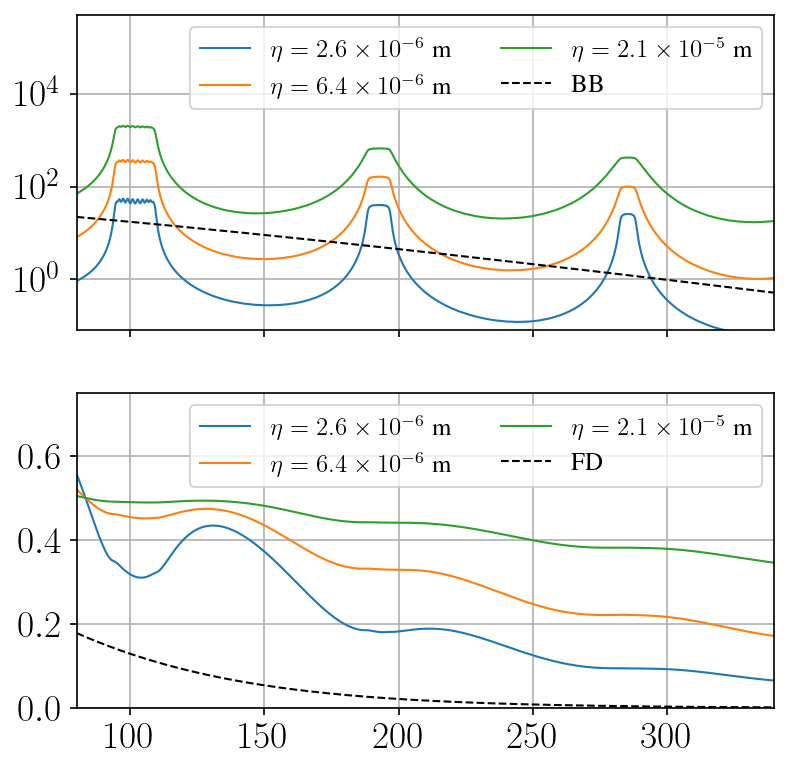

In [67]:
emodes_files = ['./Data/Emodes/Emodes_0_6pi_Tp0.01_L1200_Np12.npz',
                './Data/Emodes/Emodes_0_6pi_Tp0.01_L1200_Np12.npz',
                './Data/Emodes/Emodes_0_6pi_Tp0.01_L1200_Np12.npz']
PN_files = ['./Data/krylov/Photon_n_0_6pi_kry_Tp0.01_n500_gr1.0e+10_gc5.0e+12.npz',
            './Data/krylov/Photon_n_0_6pi_kry_Tp0.01_n500_gr1.0e+10_gc5.0e+11.npz',
            './Data/krylov/Photon_n_0_6pi_kry_Tp0.01_n500_gr1.0e+10_gc5.0e+10.npz']
              

fig, axs = plt.subplots(2, 1, sharex=True,figsize=(6,6))
plt.subplot(211)

for i in range(3):
    emodes = np.load(emodes_files[i], allow_pickle=True)
    ks = emodes["ks"]
    G_in = emodes["G_in"]
    G_out = emodes["G_out"]
    G_out_ep = emodes["G_out_ep"]
    Omega_k = ks/lp*c0/gamma
    nit = np.load(PN_files[i])
    Nk = nit["Nk"]
    Sout = func_Sout(Nk,Omega_k,G_out)
    plt.plot(Omega_k,Sout,linewidth=1)

plt.plot(Omega_k, Omega_k /(np.exp(hbar_normal*Omega_k/(kb_normal*Temp))-1),'k--' ,label=r'$\frac{\omega}{(e^{\hbar\omega/k_b T} -1)}$',linewidth=1)
plt.legend([r'$\eta=2.6 \times 10^{-6}$~m',r'$\eta=6.4 \times 10^{-6}$~m',r'$\eta=2.1 \times 10^{-5}$~m','BB'],fontsize=12,ncol=2)

plt.grid()
plt.xlim([80,340])
plt.ylim([0.81e-1,5e5])
plt.yscale('log')

plt.subplot(212)

for i in range(3):
        nit = np.load(PN_files[i])
        Nb = nit["Nb"]
        nn = 500
        omega_n = np.linspace(0.1,5.2e2,nn)
        plt.plot(omega_n,Nb/601,linewidth=1)


plt.plot(Omega_k, 1 /(np.exp(hbar_normal*Omega_k/(kb_normal*Temp))+1),'k--' ,label=r'$\frac{1}{(e^{\hbar\omega/k_b T} +1)}$',linewidth=1)
plt.legend([r'$\eta=2.6 \times 10^{-6}$~m',r'$\eta=6.4 \times 10^{-6}$~m',r'$\eta=2.1 \times 10^{-5}$~m','FD'],fontsize=12,ncol=2)

plt.ylim([0,0.75])
plt.grid()
plt.show()



Combined Plot

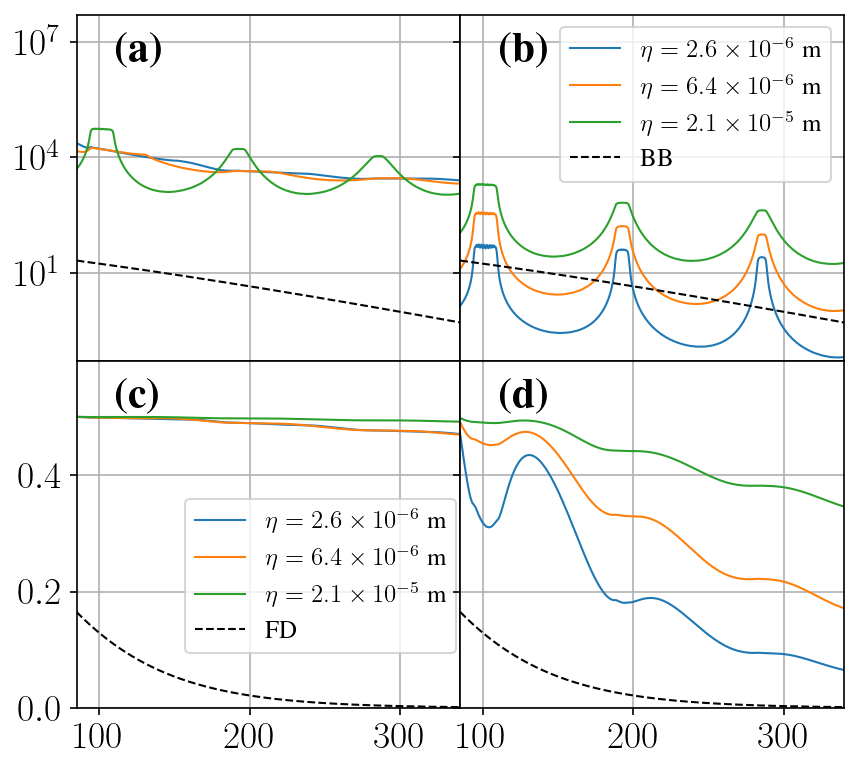

In [106]:
fig, axs = plt.subplots(2, 2, sharex=True,sharey='row',figsize=(6.6,6))
############## plot1
##############
ax=plt.subplot(221)
ax.text(0.1, 0.95, r'\textbf{(a)}', transform=ax.transAxes, fontsize=20, va='top')
emodes_files = ['./Data/Emodes/Emodes_0_6pi_Tp0.4_L1200_Np12.npz',
                './Data/Emodes/Emodes_0_6pi_Tp0.1_L1200_Np12.npz',
                './Data/Emodes/Emodes_0_6pi_Tp0.01_L1200_Np12.npz']
PN_files = ['./Data/krylov/Photon_n_0_6pi_kry_Tp0.40_n500_gr1.0e+10_gc1.0e+09.npz',
            './Data/krylov/Photon_n_0_6pi_kry_Tp0.10_n500_gr1.0e+10_gc1.0e+09.npz',
            './Data/krylov/Photon_n_0_6pi_kry_Tp0.01_n500_gr1.0e+10_gc1.0e+09.npz']
              

for i in range(3):
    emodes = np.load(emodes_files[i], allow_pickle=True)
    ks = emodes["ks"]
    G_in = emodes["G_in"]
    G_out = emodes["G_out"]
    G_out_ep = emodes["G_out_ep"]
    Omega_k = ks/lp*c0/gamma
    nit = np.load(PN_files[i])
    Nk = nit["Nk"]
    Sout = func_Sout(Nk,Omega_k,G_out)
    plt.plot(Omega_k,Sout,linewidth=1)

plt.plot(Omega_k, Omega_k /(np.exp(hbar_normal*Omega_k/(kb_normal*Temp))-1),'k--' ,label=r'$\frac{\omega}{(e^{\hbar\omega/k_b T} -1)}$',linewidth=1)
#plt.legend([r'$\eta=2.6 \times 10^{-6}$~m',r'$\eta=6.4 \times 10^{-6}$~m',r'$\eta=2.1 \times 10^{-5}$~m','BB'],fontsize=12)

plt.grid()
plt.xlim([85,340])
plt.ylim([0.05,0.5e8])
plt.yscale('log')

ax = plt.subplot(223)
ax.text(0.1, 0.95, r'\textbf{(c)}', transform=ax.transAxes, fontsize=20, va='top')
for i in range(3):
        nit = np.load(PN_files[i])
        Nb = nit["Nb"]
        nn = 500
        omega_n = np.linspace(0.1,5.2e2,nn)
        plt.plot(omega_n,Nb/601,linewidth=1)


plt.plot(Omega_k, 1 /(np.exp(hbar_normal*Omega_k/(kb_normal*Temp))+1),'k--' ,label=r'$\frac{1}{(e^{\hbar\omega/k_b T} +1)}$',linewidth=1)
plt.legend([r'$\eta=2.6 \times 10^{-6}$~m',r'$\eta=6.4 \times 10^{-6}$~m',r'$\eta=2.1 \times 10^{-5}$~m','FD'],fontsize=12, bbox_to_anchor=(0.25, 0.38)
)

plt.ylim([0,0.56])
plt.grid()


############## plot1
##############
ax=plt.subplot(222)
ax.text(0.1, 0.95, r'\textbf{(b)}', transform=ax.transAxes, fontsize=20, va='top')

emodes_files = ['./Data/Emodes/Emodes_0_6pi_Tp0.01_L1200_Np12.npz',
                './Data/Emodes/Emodes_0_6pi_Tp0.01_L1200_Np12.npz',
                './Data/Emodes/Emodes_0_6pi_Tp0.01_L1200_Np12.npz']
PN_files = ['./Data/krylov/Photon_n_0_6pi_kry_Tp0.01_n500_gr1.0e+10_gc5.0e+12.npz',
            './Data/krylov/Photon_n_0_6pi_kry_Tp0.01_n500_gr1.0e+10_gc5.0e+11.npz',
            './Data/krylov/Photon_n_0_6pi_kry_Tp0.01_n500_gr1.0e+10_gc5.0e+10.npz']
              



for i in range(3):
    emodes = np.load(emodes_files[i], allow_pickle=True)
    ks = emodes["ks"]
    G_in = emodes["G_in"]
    G_out = emodes["G_out"]
    G_out_ep = emodes["G_out_ep"]
    Omega_k = ks/lp*c0/gamma
    nit = np.load(PN_files[i])
    Nk = nit["Nk"]
    Sout = func_Sout(Nk,Omega_k,G_out)
    plt.plot(Omega_k,Sout,linewidth=1)

plt.plot(Omega_k, Omega_k /(np.exp(hbar_normal*Omega_k/(kb_normal*Temp))-1),'k--' ,label=r'$\frac{\omega}{(e^{\hbar\omega/k_b T} -1)}$',linewidth=1)
plt.legend([r'$\eta=2.6 \times 10^{-6}$~m',r'$\eta=6.4 \times 10^{-6}$~m',r'$\eta=2.1 \times 10^{-5}$~m','BB'],fontsize=12)

plt.grid()
plt.xlim([85,340])
#plt.ylim([0.81e-1,5e5])
plt.yscale('log')

ax=plt.subplot(224)
ax.text(0.1, 0.95, r'\textbf{(d)}', transform=ax.transAxes, fontsize=20, va='top')
for i in range(3):
        nit = np.load(PN_files[i])
        Nb = nit["Nb"]
        nn = 500
        omega_n = np.linspace(0.1,5.2e2,nn)
        plt.plot(omega_n,Nb/601,linewidth=1)


plt.plot(Omega_k, 1 /(np.exp(hbar_normal*Omega_k/(kb_normal*Temp))+1),'k--' ,label=r'$\frac{1}{(e^{\hbar\omega/k_b T} +1)}$',linewidth=1)
#plt.legend([r'$\eta=2.6 \times 10^{-6}$~m',r'$\eta=6.4 \times 10^{-6}$~m',r'$\eta=2.1 \times 10^{-5}$~m','FD'],fontsize=12)

plt.ylim([0,0.595])
plt.grid()
plt.subplots_adjust(hspace=0,wspace=0.0)  # Zero vertical spacing between subplots
plt.show()
